# Intro to machine learning

## Prerequisites
- [Basic Python](https://github.com/AI-Core/Python/blob/master/Intro%20to%20Python%20solutions.ipynb)

## Why do we care about machine learning?

If we had a model of the world (like a perfect simulation) then we'd be able to solve all problems.
We'd be able to simulate what the weather would be like tomorrow. 
Or what drugs will be effective for treating diseases.
Or what combination of words will make someone do exactly what you want.
Or all other problems.

**Building machines which can model the world (make accurate predictions about it) is the goal of AI.**

However, we actually never have a perfect model of the world - the world is too complex!

"All models are wrong, but some are useful" - George Box

Because we can't have perfect models, we have to settle with predictive models. 

In order to achieve goals, animals have to understand how the world works. 
Over time they build up mental models of how the world behaves. 
If I see clouds I can predict how likely it is to rain.
If I push this chair i can predict whether it will slide across the floor or topple over.
For these simple examples, we can make pretty good predictions.
This is probably because we have experienced a lot of similar situations, and can generalise

Machine learning is all about learning to represent the relationships between inputs and outputs. These inputs and outputs can take many forms.

![](images/inp-out.jpg)

We'd like to be able to build algorithms that can learn to use inputs to predict useful outputs.

Almost all machine learning algorithms consist of 4 components:
1. the data
2. the model
3. the criterion
4. the optimiser

This notebook will introduce you to all of those, with simple, practical examples.

## Side note - three types of Machine Learning

There are three main categories of problems within Machine Learning. It's worth knowing these straight away.

### **Unsupervised learning** 
Where we only have an input and try to predict something useful as an output, without being explicitly shown examples of what the output should be. This  what data is likely to in order to better understand the underlying structure of it. E.g. we have data about houses and try to split these examples into different clusters.

### **Reinforcement Learning**
Where our algorithm interacts with it's evironment and has to learn what actions to take to perform a task. E.g. we are trying to get an robot to walk or an algorithm to learn how to win at chess.

### **Supervised Learning**
Where we predict an output from a input, given examples of input-output pairs. E.g. we use different features about a house such as location, number of rooms, etc and try to predict the price.

In this notebook, and the first series of lectures, we will be learning about supervised learning - where we have datasets with both input features and output labels. Later notebooks will cover unsupervised learning and reinforcement learning. 

## 1. What is Data?

As we saw above, algorithms can take inputs and produce outputs of many different forms, types, and shapes. In essence, all of these inputs and outputs are types of *data*.

Data in and of itself is quite an abstract notion. What is data? How do we quantify it? How can we structure and organise data in a way that algorithms can interpret? This is what we will explore next.

Imagine we would like to predict the average salary of a person. That is - we will capture the notion of a 'person' as a group of data points, and then somehow use this to predict a single data point - or scalar - being the average salary we can expect that person would achieve.

How would we quantify a person in data? What kind of properties of that person would we capture? Which would be more useful or relevant for predicting their salary? 

How could we structure this data in a format which algorithms can interpret?


### The Problem

Let's import our own dataset.

In `data/income_data.csv`, we have a .csv file containing 30 data points - examples of people in terms of their Age, and their yearly income in thousands. This is what it looks like:

| Age (Years) | Salary (£K) |
|-------------|-------------|
| 43          | 40.3453          |
| 32          | 36.4522        |
| 64          | 55.2352          |



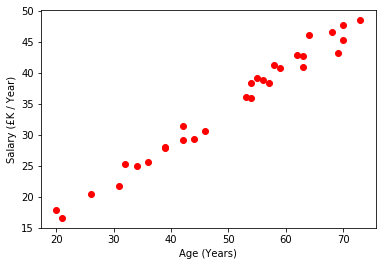

In [5]:
# Let's import some data.
import numpy as np
import matplotlib.pyplot as plt
 
data_income = np.genfromtxt('data/income_data.csv', delimiter=',') ## Import income data and save to variable.

X = data_income[:, 0] ## Extract an array of the ages from the data.
Y = data_income[:, 1] ## Extract an array of the salaries from the data.

def plot_data(X, Y):
    plt.figure() # create a figure
    plt.scatter(X, Y, c='r') # plot the data in color=red
    plt.xlabel('Age (Years)')
    plt.ylabel('Salary (£K / Year)')
    plt.show()
    
plot_data(ages, salaries)

As we can see from above, our *inputs* would be the ages, and our *outputs* or *labels* would be the salary they earn.

In this example, although we can imagine that the data was collected or observed empirically, the true underlying *data generating distribution*, or *data generating phenomenon* that in this case, is linear. 

There is a straight-line relationship between the ages, and the salary (i.e. $y=wx + b$). In life, this is not always the case. We can have much more complex relationships between features, and labels, as you can imagine.

Let's explore how we can generally structure and shape our data.

![image](images/data.jpg)
![image](images/labels.jpg)


As shown above, our supervised dataset consists of $m$ inputs (30 in our income data example). Each of these inputs has $n$ features, or properties (n-dimensional feature vectors). In our income dataset, each input has just a single feature (Age) - and each input has a corresponding label (it's a supervised dataset), being the Salary.

As we illustrated earlier, inputs and outputs can take many forms. The inputs do not have to be vectors and the labels do not have to be scalars as shown in the example.

- Image inputs could be matrices with width and height, rather than just vector length.
- Inputs could only have one feature, in which case they would be scalars (this is what we will implement now)

- If we were trying to classify an input as a member of a particular, discrete class (classifying dogs vs cats vs turtles for example), then we would have a vector output with the length of the number of classes - where each of those elements represents the confidence with which our model predicts the input to be a member of that corresponding class.
- Outputs could be an image or a video or a sound wave or spectrogram

<strong>Common synonyms</strong>
- Inputs = Features
- Outputs = Labels

## 2. The model - How can we make predictions?
We want to be able use information that we have, to predict useful information that we don't have. 
This is an input output problem - we have an input (info we know), we want an output (info we don't have).
Mathematical functions can represent input output relationships e.g. $y = 2x +3$.
So we will use mathematical functions to model the relationship between our inputs and outputs.

Lets create a simple model that represents a straight line (linear) relationship between the input and output (like our income data!) and use it to make predictions about outputs, given inputs.

Our model will be of the form $y = wx + b$.

![title](images/NN1_singlevar_lr_equation.JPG)

In [6]:
class LinearHypothesis:
    def __init__(self): #initalize parameters 
        self.w = np.random.randn() ## randomly initialise weight
        self.b = np.random.randn() ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate output from an input in our model?
        ypred = self.w * X + self.b ## make a prediction
        return ypred # return prediction
    
    def update_params(self, new_w, new_b):
        self.w = new_w ## set this instance's weights to the new weight value passed to the function
        self.b = new_b ## do the same for the bias

In [7]:
H = LinearHypothesis() # instantiate our linear model
y_hat = H(X) # make prediction
print('Input:',X, '\n')
print('W:', H.w, 'B:', H.b, '\n')
print('Prediction:', y_hat, '\n')

Input: [36. 56. 63. 31. 63. 70. 42. 55. 32. 20. 42. 54. 73. 46. 57. 59. 64. 58.
 53. 68. 69. 54. 62. 21. 26. 39. 39. 70. 34. 44.] 

W: 0.8739608408106097 B: 0.5868361840550423 

Prediction: [32.04942645 49.52864327 55.64636916 27.67962225 55.64636916 61.76409504
 37.2931915  48.65468243 28.55358309 18.066053   37.2931915  47.78072159
 64.38597756 40.78903486 50.40260411 52.15052579 56.52033    51.27656495
 46.90676075 60.01617336 60.8901342  47.78072159 54.77240831 18.94001384
 23.30981805 34.67130898 34.67130898 61.76409504 30.30150477 39.04111318] 



Lets visualise our hypothesis against the true features and labels

In [8]:
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

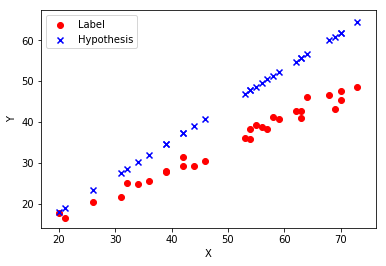

In [9]:
plot_h_vs_y(X, y_hat, Y)

## 3. The criterion - How do we know how good our model is?

Our criterion should be a measure of how bad our model is. We will use it to compare different models. As the model gets worse the loss function should return larger values.

<strong>Common synonyms</strong>
- Loss funtion = cost function = criterion = error function

### Mean squared error (MSE) loss

**One way** to evaluate the performance of a model that predicts continuous (not discrete or bounded) outputs is to use the mean squared error loss. This does exactly what you think: it calculates the error (difference between our model's prediction and the true label) and then squares it and takes the mean of those square errors for each example. Squaring any value makes it positive, so as long as the error is not zero it will increase the value of the loss - regardless of whether our prediction is below or above the value of the label, the values of that **squared** difference will increase the returned loss.

There are many other criterions that are useful for different tasks (e.g. cross entropy loss for classification)

Let's write a function to calculate the cost using the mean squared error loss function.

![title](images/NN1_cost_function.JPG)

In [14]:
def L(y_hat, labels):
    errors = y_hat - labels ## calculate errors
    squared_errors = errors ** 2 ## square errors
    mean_squared_error = sum(squared_errors) / len(squared_errors) ## calculate mean 
    return mean_squared_error # return loss

In [15]:
cost = L(y_hat, Y)
print(cost)

109.91022485448588


## 4. The optimiser

The optimiser optimises our model. Most machine learning models are **parametric**, which means that the function which they represent depends on their parameters (in our case the weight (slope) and bias (intercept)). Different optimisers improve our models using different algorithms.

In this notebook we will implement some fundamental optimisation techniques: random search and grid search.

### Random Search
Random seach is the process of randomly choosing values within a specified range and testing them to evaluate how good they are. E.g. test random values between 0 and 10.

![](images/NN1_randomsearch.JPG)

In [29]:
def random_search(n_samples, limit=20):
    best_weights = np.random.uniform(-limit, limit) # no best weight found yet
    best_bias = np.random.uniform(-limit, limit) # no best bias found yet
    lowest_cost = float('inf') # initialize it very high
    for i in range(0, n_samples): # try this many different parameterisations
        w = np.random.uniform(-limit, limit) # randomly sample a weight within the limits of the search
        b = np.random.uniform(-limit, limit) # randomly sample a bias within the limits of the search
        H.update_params(w, b) # update our model with random parameters
        y_hat = H(X) # make prediction
        cost = L(y_hat, Y) # calculate loss
        if cost < lowest_cost: # if this is the best parameterisation so far
            lowest_cost = cost # update the lowest running cost to the cost for this parameterisation
            best_weights = w # get best weights so far from the model
            best_bias = b # get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias

Lowest cost of 184.54957019514632 achieved with weight of 0.9224290992987569 and bias of 1.2297892468113147


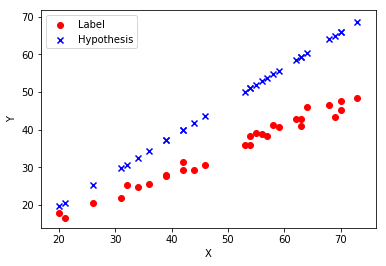

In [30]:
best_weights, best_bias = random_search(100) # do 100 samples in a random search 
H.update_params(best_weights, best_bias) # make sure to set our model's weights to the best values we found
plot_h_vs_y(X, H(X), Y)

### What happened?

Our random search optimisation was able to fit the input-output relationship of our data! Or at least it got close. 

#### What would happen if our true parameter values were outside of the range [-20, 20]? 

The model performance wouldn't improve much!

This is because of the limits of the values of the parameters that we perform the grid search over. In this case, by default we are only trying parameters in the range from -20 to 20. But if the true bias were to be, say 30, which is outside of this range - then the model would never sample a value close to this. 

So here we've assumed the range of values that our optimal parameterisation might be included in. Feel free to change this limit in the function definition to see the how the model performance changes.

### Grid Search

Grid search is the process of trying out values at common intervals within a specified range and testing them to evaluate how good they are. E.g. test the values [0, 1, 2, 3, 4, 5]

![](images/NN1_gridsearch.JPG)

In [31]:
from itertools import permutations
def generate_grid_search_values(n_params, n_samples=100, minval=-2.5, maxval=2.5):
    n_samples_per_param = int(np.power(n_samples, 1 / n_params)) # want 100 samples for 2 variables, so try 10 different values for each parameter because 10^2=100
    print(f'Trying {n_samples_per_param} samples per parameter')
    param_values = np.linspace(minval, maxval, n_samples_per_param) ## get list of different parameters to try
    grid_samples = permutations(param_values, n_params) ## try every possible permutation of the param values
    return grid_samples

def grid_search(grid_search_values):
    best_weights = np.random.randn() ## no best weight found yet
    best_bias = np.random.randn() ## no best bias found yet
    lowest_cost = float('inf') ## initialize it very high
    for search_val in grid_search_values: # for each model parameterisation that we will try 
        w, b = search_val
        H.update_params(w, b) ## update model parameters
        y_hat = H(X) ## make prediction
        cost = L(y_hat, Y) ## calculate loss
        if cost < lowest_cost: ## if this is the best parameterisation so far
            lowest_cost = cost ## update the lowest running cost to the cost for this parameterisation
            best_weights = w ## get best weights so far from the model
            best_bias = b ## get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias

Trying 10 samples per parameter
Lowest cost of 33.45766276364499 achieved with weight of 0.8333333333333335 and bias of -2.5


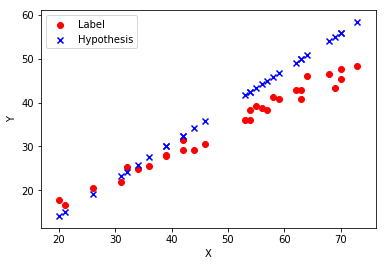

Trying 9 samples per parameter
Lowest cost of 2.626840407043302 achieved with weight of 0.625 and bias of 2.5


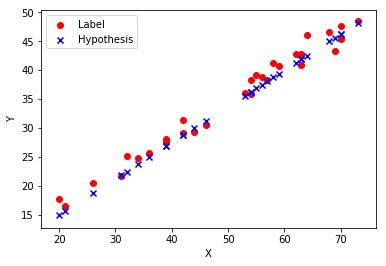

In [34]:
# try using 100 grid search values
grid_search_values = generate_grid_search_values(2, n_samples=100) # generate model parameterisations to try
best_weights, best_bias = grid_search(grid_search_values) # perform grid search
H.update_params(best_weights, best_bias) ## update model with best parameters found
plot_h_vs_y(X, H(X), Y) # plot predictions and true labels

grid_search_values = generate_grid_search_values(2, n_samples=99) # generate model parameterisations to try
best_weights, best_bias = grid_search(grid_search_values) # perform grid search
H.update_params(best_weights, best_bias) # update model with best parameters found
plot_h_vs_y(X, H(X), Y) # plot predictions and true labels

### What happened?

#### Why the difference in predictions from 100 samples (pretty bad) and 99 samples (pretty good)? 

Well, grid search will only test parameterisations that are exactly on it's grid. In the case of the 100 samples, the optimal parameters do exist within this region, but they dont lie exactly on the grid - they lie between points that we test on the grid. Hence those optimal parameters are not found. 

With the 99 samples, one of the parameterisations (pairs of weight and bias) on our grid lies close to the actual optimal values. So the model manages to much better represent the input-output relationship between our features and labels.

Another danger would be that the space which we are searching with our grid does not contain the optimal parameterisation - which is a common issue we face with Random Search.

### Will random search and grid search get us all the way?

Aside from the issues showcased above, the major limitation of these search methods is how they scale with the number of parameters in our model. 

To model more complex functions we'll need more complex models - models with more parameters. 

But the time taken for these search methods scales **exponentially** with the number of parameters. This is because these methods have to search the whole space, and they keep searching even if they find the optimal value (they can't be sure it's the best parameterisation in the domain that they're checking until they've compared it to everywhere else.

## Yes, you made it!
In this notebook, we learnt the very basic recipe for making machine learning algorithms. This consisted of:
1. The data - our examples of inputs and outputs (in the supervised case) which determine the function that our model will learn to represent and hence the problem that we are solving
2. The model - our mathematical function that we pass our data forward through to make a prediction for the output
3. The criterion - how we measure how bad our model is. We used the mean squared error loss function.
4. The optimiser - our method for updating the parameters of our models. We tried out random search and grid search.


## Next steps
- [Gradient based optimisation](https://github.com/AI-Core/Strong-ML-Foundations/blob/master/Gradient%20based%20optimisation.ipynb) - in this notebook we will look at optimisation techniques that do scale to 
more complex models and problems